In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r'E:\Data Analyst Bootcamp\python-projects\titanic-eda\data\train.csv')

explore the data

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.isnull().sum()
# age_null=177
# cabin_null=687
# embrked_null=2

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
pd.set_option('display.float_format','{:.2f}'.format)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


clean the data

In [10]:
df["Survived"]=df["Survived"].apply(lambda x:'Yes' if x==1 else 'No')

In [11]:
df['Age']=df['Age'].apply(lambda x:
                        np.mean(df['Age'] )
                        if pd.isna(x)
                        else x)

In [12]:
df['Cabin'].fillna('Unknown',inplace=True)

In [13]:
df['Embarked'].mode()
df['Embarked'].fillna('S',inplace=True)

In [14]:
# int(np.mean(df['Age']))
# np.std(df['Age'])
# np.mean(df['Fare'])

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,Unknown,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,Unknown,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,Unknown,S
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.70,1,2,W./C. 6607,23.45,Unknown,S
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


visuals

In [ ]:
# countOfSurvived=df.groupby('Sex')['Sex']['Name'].count()
# plt.bar(countOfSurvived.index,countOfSurvived/sum(countOfSurvived)*100,
#         color=['blue' if x=='male'
#                 else 'red' for x in countOfSurvived.index]
        
#         )
# plt.title('Survival rate by gender')
# plt.xlabel('Gender')
# plt.ylabel('Survival rate')

IndexError: Column(s) Sex already selected

Text(0.5, 1.0, 'Age Distribution of Passengers')

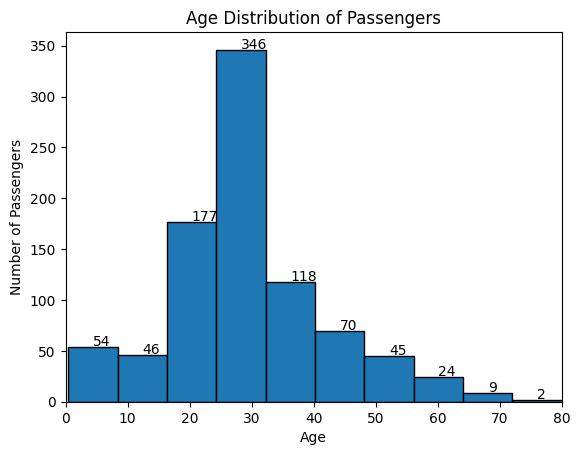

In [49]:
Ages=df['Age']
counts ,bin_edges=np.histogram(Ages,bins=10)
plt.hist(Ages,
         bins=10,
         edgecolor='#000')
for i in range (len(counts)):
    plt.text(
        x=(bin_edges[i]+bin_edges[i+1])/2,
        y=counts[i]+1,
        s=str(counts[i])

    )
plt.xlim(0, 80)

plt.xticks(range(0,81,10))
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Passengers')


The passenger population was highly concentrated around the age of 30, indicating that young adults formed the core demographic of Titanic travelers.

In [ ]:
df['Embarked'].count_values()

AttributeError: 'Series' object has no attribute 'count_values'